In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import seaborn as sns
import cobra
import scipy.stats as st
import scipy
sys.path.append('../../code/')
import leakage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_387/1968322243.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
folder = Path('/Users/ssulheim/Library/CloudStorage/OneDrive-UniversitédeLausanne/UNIL/leakage/experimental work/KEIO_KO_growth_test_and_exometabolome_screening_240122/exometabolome')

In [5]:
fn = folder / 'SM_MPTA_Results.xlsx'
mapping_fn = folder.parent.parent /'sintef_sept_23/exometabolome'/'met_to_bigg.csv'
od_fn = folder / '..' / 'plan_240122.xlsx'
id_mapping_fn = folder / 'id_mapping.csv'

In [6]:
mapping_dict = pd.read_csv(mapping_fn, index_col = 0).to_dict()['BiGG ID']

In [7]:
id_mapping = pd.read_csv(id_mapping_fn, index_col=0).to_dict()['OD_ID']

In [8]:
id_mapping

{'SR_MPTA_020204_11A-2_WT_22': '11A-2: WT',
 'SR_MPTA_020204_11B-2_WT_23': '11B-2: WT',
 'SR_MPTA_020204_11C-2_WT_24': '11C-2: WT',
 'SR_MPTA_020204_12A-1_pool_A_25': '12A-1: pool',
 'SR_MPTA_020204_12B-1_pool_B_26': '12B-1: pool',
 'SR_MPTA_020204_12C-1_pool_C_27': '12C-1: pool',
 'SR_MPTA_020204_1A-2_aceE_1': '1A-2: aceE',
 'SR_MPTA_020204_1B-2_aceE_2': '1B-2: aceE',
 'SR_MPTA_020204_1C-2_aceE_3': '1C-2: aceE',
 'SR_MPTA_020204_2A-2_cyoD_4': '2A-2: cyoD',
 'SR_MPTA_020204_2B-2_cyoD_5': '2B-2: cyoD',
 'SR_MPTA_020204_2C-2_cyoD_6': '2C-2: cyoD',
 'SR_MPTA_020204_3A-2_lacA_7': '3A-2: lacA',
 'SR_MPTA_020204_3B-2_lacA_8': '3B-2: lacA',
 'SR_MPTA_020204_3C-2_lacA_9': '3C-2: lacA',
 'SR_MPTA_020204_4A-2_nuoA_10': '4A-2: nuoA',
 'SR_MPTA_020204_4B-2_nuoA_11': '4B-2: nuoA',
 'SR_MPTA_020204_4C-2_nuoA_12': '4C-2: nuoA',
 'SR_MPTA_020204_5A-2_pgi_13': '5A-2: pgi',
 'SR_MPTA_020204_5B-2_pgi_14': '5B-2: pgi',
 'SR_MPTA_020204_5C-2_pgi_15': '5C-2: pgi',
 'SR_MPTA_020204_6A-2_rpe_16': '6A-2: rpe',

In [9]:
df_raw = pd.read_excel(fn, skiprows=1)
# df_raw.set_index('Unnamed: 0', inplace=True)
df_raw['Metabolite'] = [x.rstrip() for x in df_raw['Unnamed: 0']]

In [10]:
value_cols = [x for x in id_mapping.keys() if not 'pool' in x]
count_df = df_raw[['Metabolite']+value_cols]

In [11]:
df = count_df.melt(id_vars='Metabolite', value_vars=value_cols, value_name='Count', var_name='Sample ID')

In [84]:
count_df.head()

,SR_MPTA_020204_11A-2_WT_22,SR_MPTA_020204_11B-2_WT_23,SR_MPTA_020204_11C-2_WT_24,SR_MPTA_020204_1A-2_aceE_1,SR_MPTA_020204_1B-2_aceE_2,SR_MPTA_020204_1C-2_aceE_3,SR_MPTA_020204_2A-2_cyoD_4,SR_MPTA_020204_2B-2_cyoD_5,SR_MPTA_020204_2C-2_cyoD_6,SR_MPTA_020204_3A-2_lacA_7,...,SR_MPTA_020204_4C-2_nuoA_12,SR_MPTA_020204_5A-2_pgi_13,SR_MPTA_020204_5B-2_pgi_14,SR_MPTA_020204_5C-2_pgi_15,SR_MPTA_020204_6A-2_rpe_16,SR_MPTA_020204_6B-2_rpe_17,SR_MPTA_020204_6C-2_rpe_18,SR_MPTA_020204_8A-2_sucB_19,SR_MPTA_020204_8B-2_sucB_20,SR_MPTA_020204_8C-2_sucB_21
Metabolite,,,,,,,,,,,,,,,,,,,,,
PYRIMIDINE,47356.347137,42889.580471,18155.787101,50023.783629,31174.851170,50579.781042,24415.467485,26193.337538,19574.337478,23493.916421,...,22825.494866,28499.882535,15866.058666,14428.263031,22631.670262,160475.510205,19646.415859,17325.113880,14825.695059,22431.917567
DIHYDROURACIL,9768.342472,12832.818031,11563.144639,11448.115372,12011.561767,12191.496567,12498.812263,8260.733536,10866.777095,11135.293359,...,9593.234482,11247.099867,10973.870764,11637.945606,10964.187519,11716.403133,10895.332005,11369.180573,11200.109287,12807.064594
N-ACETYLLEUCINE,22595.110955,27614.661665,29141.727147,27846.134389,11496.515841,24639.606295,63840.483757,25701.580775,43813.048178,38760.163576,...,37010.346349,26664.051941,21699.175530,21858.142679,33792.563726,35901.425151,30016.042822,39218.474513,32456.725537,34003.374089
N-ACETYLPHENYLALANINE,3603.654607,3715.348096,4190.114510,6845.598828,4759.130573,6082.996870,7024.239693,2878.137842,4628.747494,3877.059606,...,4136.589201,3294.192726,3225.537086,2948.927289,7875.048935,6282.244666,9191.572412,7730.434579,6029.492799,5668.373603
4-ACETAMIDOBUTANOATE,30039.380949,33748.085566,36854.890278,9081.528597,7072.478329,10632.222184,19950.582224,14204.690337,11268.895076,37192.509105,...,12108.487909,28844.500587,20986.256067,20242.761844,12677.250327,15070.421739,15585.475463,7303.713343,6407.674096,7238.772973


# Remove outliers

In [69]:
# Adenosine value that seems way too high
df.drop(index=1565, inplace=True)

In [70]:
for met in count_df.Metabolite.unique():
    try:
        mapping_dict[met]
    except KeyError:
        print(met)

PYRIMIDINE
DIHYDROURACIL
N-ACETYLLEUCINE
N-ACETYLPHENYLALANINE
4-ACETAMIDOBUTANOATE
DETHIOBIOTIN
THYMINE
NICOTINATE
BIOTIN
METHYLTHIOADENOSINE
TRYPTAMINE
ADENOSINE
TRIMETHYLAMINE
CHOLINE
TYRAMINE
AICAR
OXOPROLINE
INOSINE
METHYLGUANIDINE
KYNURENATE
RIBOFLAVIN
ANTHRANILATE
GUANINE
N-ACETYLSERINE
XANTHURENATE
N-ACETYLPUTRESCINE
ETHANOLAMINE
EPINEPHRINE
TRIGONELLINE
ADENOSINE 3', 5'-CYCLIC PHOSPHATE
4-IMIDAZOLEACETATE
N-ALPHA-ACETYLLYSINE
CYCLIC GMP
GUANIDINOSUCCINATE
S-ADENOSYLHOMOCYSTEINE
OPHTHALMATE
HISTIDINOL
CADAVERINE
PUTRESCINE
1, 3-DIAMINOPROPANE
N,N,N-TRIMETHYLLYSINE
HEXANOATE
FAD
S-ADENOSYLMETHIONINE
ARGININE
STEAROYLCARNITINE (C18)
HEXANOYLCARNITINE (C6)
CARNITINE (C0)
SALICYLATE
PYRIDOXAL
URACIL
GLYCEROL
2-OXOBUTANOATE/ACETOACETATE
GLUCURONOLACTONE
HYPOXANTHINE
2, 5-DIHYDROXYBENZOATE
2-HYDROXYBUTYRATE
ALPHA-HYDROXYISOBUTYRATE
3-(4-HYDROXYPHENYL)PYRUVATE
XANTHINE
3-HYDROXYBUTYRATE
HYDROXYPHENYLLACTATE
3-HYDROXYPHENYLACETATE
PANTOTHENATE
OROTATE
cAMP
O-ACETYLSERINE
3-HYDROXYANTHR

In [71]:
df['Sample'] = df['Sample ID'].map(id_mapping)
df['Strain'] = [x.split(': ')[1] for x in df['Sample']]

In [72]:
order_d = {'WT':0, 'lacA':1, 'aceE':2, 'cyoD':3, 'nuoA':4, 'pgi':5, 'rpe':6, 'sucB':7}

In [73]:
df.sort_values(by='Strain', key=lambda x: x.map(order_d))

,Metabolite,Sample ID,Count,Sample,Strain
0,PYRIMIDINE,SR_MPTA_020204_11A-2_WT_22,47356.347137,11A-2: WT,WT
226,4-ACETAMIDOBUTANOATE,SR_MPTA_020204_11C-2_WT_24,36854.890278,11C-2: WT,WT
225,N-ACETYLPHENYLALANINE,SR_MPTA_020204_11C-2_WT_24,4190.114510,11C-2: WT,WT
224,N-ACETYLLEUCINE,SR_MPTA_020204_11C-2_WT_24,29141.727147,11C-2: WT,WT
223,DIHYDROURACIL,SR_MPTA_020204_11C-2_WT_24,11563.144639,11C-2: WT,WT
...,...,...,...,...,...
2438,CIS-ACONITATE,SR_MPTA_020204_8A-2_sucB_19,67769.910692,8A-2: sucB,sucB
2437,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_8A-2_sucB_19,0.000087,8A-2: sucB,sucB
2436,MALATE,SR_MPTA_020204_8A-2_sucB_19,8883.267359,8A-2: sucB,sucB
2434,SUCCINATE,SR_MPTA_020204_8A-2_sucB_19,1734.432309,8A-2: sucB,sucB


In [74]:
df.loc[df.Metabolite == 'GLUCOSE-6-PHOSPHATE']

,Metabolite,Sample ID,Count,Sample,Strain
106,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_11A-2_WT_22,0.000108,11A-2: WT,WT
217,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_11B-2_WT_23,0.000105,11B-2: WT,WT
328,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_11C-2_WT_24,0.000104,11C-2: WT,WT
439,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_1A-2_aceE_1,0.000109,1A-2: aceE,aceE
550,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_1B-2_aceE_2,0.000101,1B-2: aceE,aceE
661,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_1C-2_aceE_3,0.000111,1C-2: aceE,aceE
772,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_2A-2_cyoD_4,0.000091,2A-2: cyoD,cyoD
883,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_2B-2_cyoD_5,0.000093,2B-2: cyoD,cyoD
994,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_2C-2_cyoD_6,0.000092,2C-2: cyoD,cyoD
1105,GLUCOSE-6-PHOSPHATE,SR_MPTA_020204_3A-2_lacA_7,0.000104,3A-2: lacA,lacA


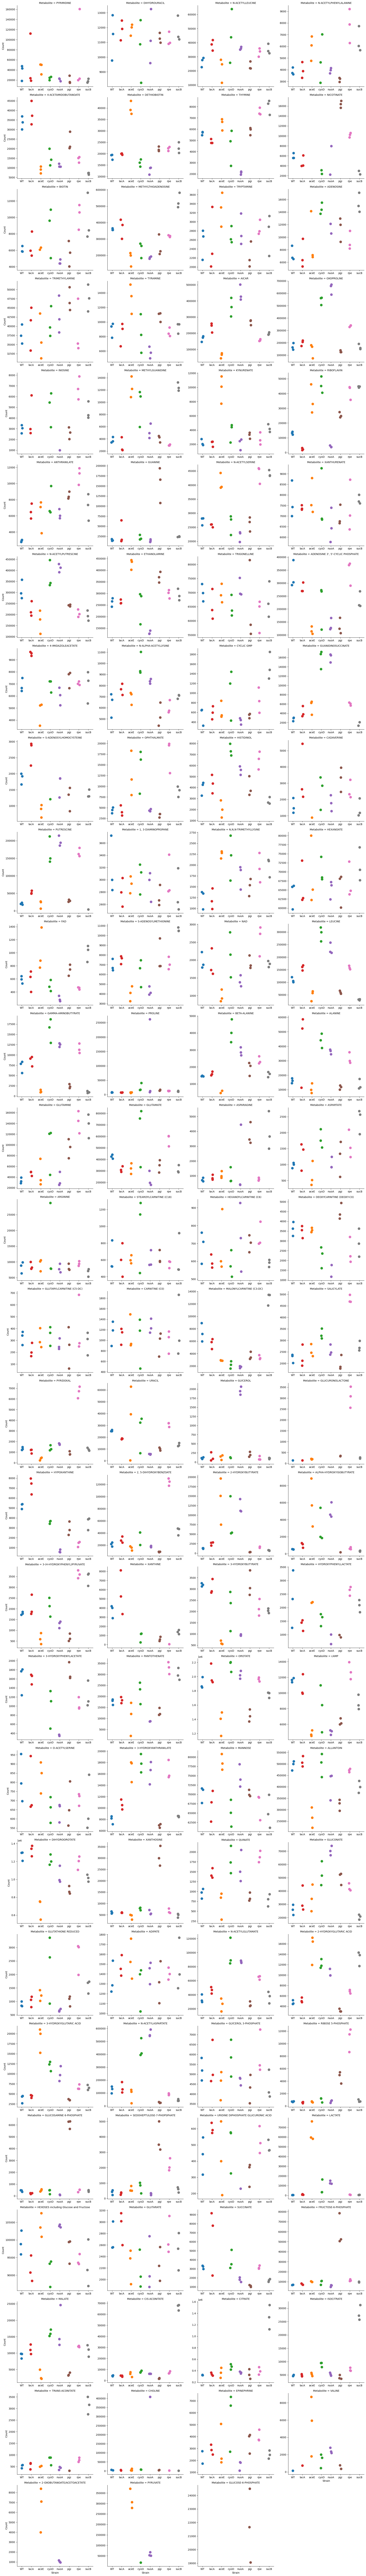

In [75]:
sns.catplot(data=df.loc[df.Count>1], x = 'Strain', y = 'Count', col='Metabolite', col_wrap=4, sharey=False, hue = 'Strain', sharex = False,  order=['WT', 'lacA', 'aceE', 'cyoD', 'nuoA', 'pgi', 'rpe', 'sucB'], s = 100) #log_scale=True,

In [76]:
wt_idx = df.Strain == 'WT'
n_tests = len(df.Metabolite.unique())
sdict = {}
data = []
for strain in ['sucB', 'aceE']:
    sidx = df.Strain == strain
    mdict = {}
    for m in df.Metabolite.unique():
        midx = df.Metabolite == m
        x = df.loc[sidx&midx, 'Count']
        y = df.loc[wt_idx&midx, 'Count']
        # res = st.mannwhitneyu(x,y) Mann Whitney doesn't work for sample sizes less than 7
        res = st.ttest_ind(x,y)
        print(strain, m,  res.pvalue, x.mean()/y.mean(), x.values)

        if (res.pvalue < 0.05) and (x.mean()>y.mean()) and (x.mean()>1):
            data.append([strain, m, res.statistic, res.pvalue, x.mean()/y.mean(), x.mean()])
            # print(x.values, y.values)
            mdict[m] = res.pvalue
    sdict[strain] = mdict

dfsa = pd.DataFrame(data, columns = ['Strain', 'Metabolite', 'Stat', 'p-value', 'Ratio', 'Mean'])

sucB PYRIMIDINE 0.1275510127925129 0.5035227224285876 [17325.11388017 14825.69505942 22431.91756694]
sucB DIHYDROURACIL 0.713512024883799 1.0354770661136234 [11369.18057252 11200.10928721 12807.06459404]
sucB N-ACETYLLEUCINE 0.036768278752529936 1.331777905259414 [39218.47451292 32456.72553703 34003.37408932]
sucB N-ACETYLPHENYLALANINE 0.016192886776792984 1.6880791655967926 [7730.43457948 6029.49279943 5668.37360257]
sucB 4-ACETAMIDOBUTANOATE 0.00018247066363783165 0.2081644456617325 [7303.71334349 6407.67409563 7238.77297267]
sucB DETHIOBIOTIN 0.06762225882765115 1.2026274771685528 [20302.27893592 22197.22757394 24981.97903011]
sucB THYMINE 0.0036847473420037213 1.4230263444956137 [8509.92906071 7263.8829003  8263.81558236]
sucB NICOTINATE 0.012031880667267368 0.2955387781531836 [2.25950646e+03 2.95296370e+03 1.04633530e-04]
sucB BIOTIN 0.09728098031975951 1.5963771084943221 [12990.11163467  7661.94225909  8418.80306984]
sucB METHYLTHIOADENOSINE 0.002907028580420388 1.481857069934049

In [77]:
dfsa.sort_values(['Strain',  'Ratio'], ascending=False)

,Strain,Metabolite,Stat,p-value,Ratio,Mean
31,sucB,CIS-ACONITATE,39.461934,2.463660e-06,1.594237e+01,6.646361e+04
34,sucB,TRANS-ACONITATE,11.878779,2.876199e-04,6.109087e+00,3.134086e+03
33,sucB,ISOCITRATE,14.198063,1.428917e-04,5.898347e+00,2.803119e+04
20,sucB,ASPARAGINE,4.295291,1.269284e-02,5.376096e+00,3.944790e+03
32,sucB,CITRATE,8.273513,1.164756e-03,4.125536e+00,1.331166e+06
19,sucB,GLUTAMINE,7.829311,1.436947e-03,4.113580e+00,1.362551e+05
9,sucB,RIBOFLAVIN,49.984928,9.585991e-07,3.388790e+00,4.448629e+04
7,sucB,METHYLGUANIDINE,18.204954,5.354353e-05,3.316259e+00,1.248423e+04
13,sucB,CYCLIC GMP,5.162078,6.688421e-03,2.860453e+00,1.543106e+03
28,sucB,2-HYDROXYGLUTARIC ACID,10.374894,4.872881e-04,2.824028e+00,1.328178e+04


In [79]:
count_df.set_index('Metabolite', inplace=True)

In [94]:
X = StandardScaler().fit_transform(count_df.T) # logscale?

In [95]:
pca = PCA(n_components=3)

In [96]:
pca.fit(X)
Xn = pca.transform(X)

In [97]:
pca.explained_variance_ratio_

array([0.20824866, 0.19216155, 0.15184717])

In [98]:
set(id_mapping.values())

{'11A-2: WT',
 '11B-2: WT',
 '11C-2: WT',
 '12A-1: pool',
 '12B-1: pool',
 '12C-1: pool',
 '1A-2: aceE',
 '1B-2: aceE',
 '1C-2: aceE',
 '2A-2: cyoD',
 '2B-2: cyoD',
 '2C-2: cyoD',
 '3A-2: lacA',
 '3B-2: lacA',
 '3C-2: lacA',
 '4A-2: nuoA',
 '4B-2: nuoA',
 '4C-2: nuoA',
 '5A-2: pgi',
 '5B-2: pgi',
 '5C-2: pgi',
 '6A-2: rpe',
 '6B-2: rpe',
 '6C-2: rpe',
 '8A-2: sucB',
 '8B-2: sucB',
 '8C-2: sucB'}

In [99]:
var = pca.explained_variance_ratio_
pca_df = pd.DataFrame(Xn, columns=[f'Principal component 1 ({var[0]*100:.1f}%)', f'Principal component 2 ({var[1]*100:.1f}%)', 'Principal component 3'])

In [100]:
pca_df['Sample'] = [id_mapping[sample] for sample in count_df.columns]
pca_df['Strain'] = [x.split(': ')[1] for x in pca_df['Sample']]

In [101]:
pca_df

,Principal component 1 (20.8%),Principal component 2 (19.2%),Principal component 3,Sample,Strain
0,0.151073,-1.979851,-3.273586,11A-2: WT,WT
1,-1.052126,-1.936041,-3.522763,11B-2: WT,WT
2,-1.058105,-1.389816,-3.294529,11C-2: WT,WT
3,9.457761,0.064627,5.804729,1A-2: aceE,aceE
4,11.647790,-1.623850,3.113386,1B-2: aceE,aceE
5,9.321107,0.010712,6.361973,1C-2: aceE,aceE
6,-6.333666,3.458094,4.020814,2A-2: cyoD,cyoD
7,-5.083996,4.254862,2.768912,2B-2: cyoD,cyoD
8,-1.117567,7.288006,0.488255,2C-2: cyoD,cyoD
9,-2.512457,-0.989311,-3.539826,3A-2: lacA,lacA


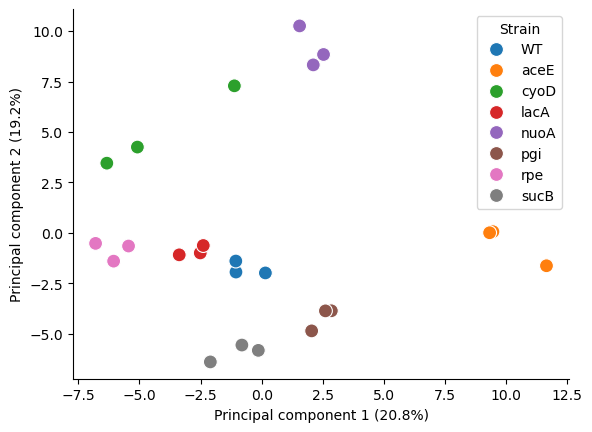

In [106]:
sns.scatterplot(data = pca_df, x = f'Principal component 1 ({var[0]*100:.1f}%)', y = f'Principal component 2 ({var[1]*100:.1f}%)', hue = 'Strain', s = 100)
sns.despine()
plt.savefig('PCA_keio_ko.pdf')

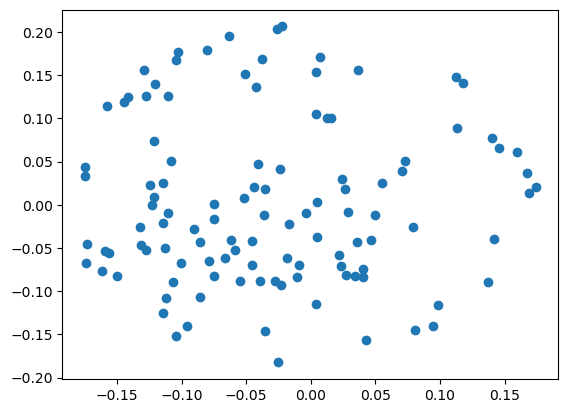

In [104]:
plt.scatter(pca.components_[0, :], pca.components_[1, :])

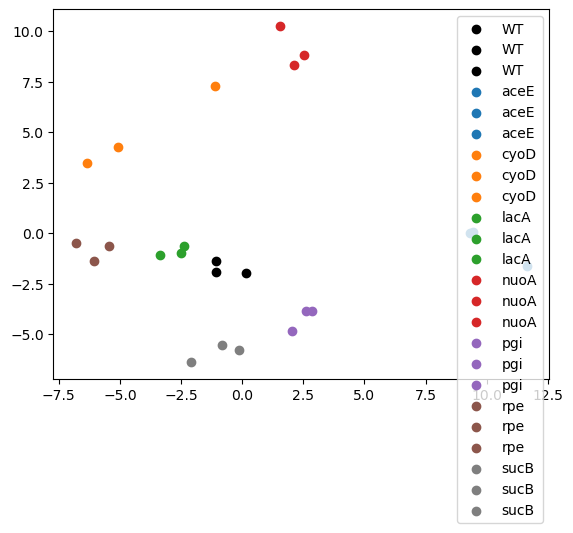

In [26]:
fig, ax =  plt.subplots(1)
for i, sample in enumerate(count_df.columns):
    sample_id = id_mapping[sample]
    strain = sample_id.split(': ')[1]
    j = int(re.search(r'\d+', sample_id).group())
    if strain == 'WT':
        ax.scatter(Xn[i,0], Xn[i, 1], label = strain, c = 'k')
    else:
        ax.scatter(Xn[i,0], Xn[i, 1], label = strain, c = f'C{j-1}')
    plt.legend()
    

In [73]:
id_mapping

{'SR_MPTA_020204_11A-2_WT_22': '11A-2: WT',
 'SR_MPTA_020204_11B-2_WT_23': '11B-2: WT',
 'SR_MPTA_020204_11C-2_WT_24': '11C-2: WT',
 'SR_MPTA_020204_12A-1_pool_A_25': '12A-1: pool',
 'SR_MPTA_020204_12B-1_pool_B_26': '12B-1: pool',
 'SR_MPTA_020204_12C-1_pool_C_27': '12C-1: pool',
 'SR_MPTA_020204_1A-2_aceE_1': '1A-2: aceE',
 'SR_MPTA_020204_1B-2_aceE_2': '1B-2: aceE',
 'SR_MPTA_020204_1C-2_aceE_3': '1C-2: aceE',
 'SR_MPTA_020204_2A-2_cyoD_4': '2A-2: cyoD',
 'SR_MPTA_020204_2B-2_cyoD_5': '2B-2: cyoD',
 'SR_MPTA_020204_2C-2_cyoD_6': '2C-2: cyoD',
 'SR_MPTA_020204_3A-2_lacA_7': '3A-2: lacA',
 'SR_MPTA_020204_3B-2_lacA_8': '3B-2: lacA',
 'SR_MPTA_020204_3C-2_lacA_9': '3C-2: lacA',
 'SR_MPTA_020204_4A-2_nuoA_10': '4A-2: nuoA',
 'SR_MPTA_020204_4B-2_nuoA_11': '4B-2: nuoA',
 'SR_MPTA_020204_4C-2_nuoA_12': '4C-2: nuoA',
 'SR_MPTA_020204_5A-2_pgi_13': '5A-2: pgi',
 'SR_MPTA_020204_5B-2_pgi_14': '5B-2: pgi',
 'SR_MPTA_020204_5C-2_pgi_15': '5C-2: pgi',
 'SR_MPTA_020204_6A-2_rpe_16': '6A-2: rpe',

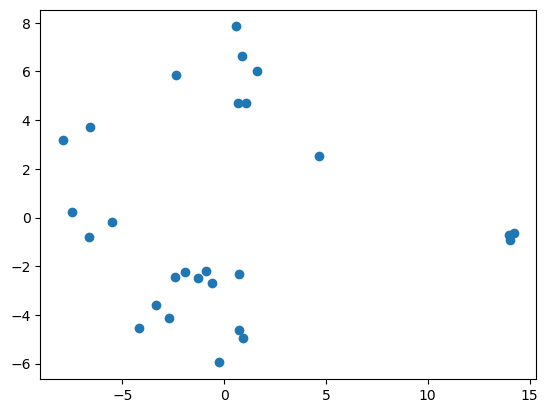

In [69]:
plt.scatter(Xn[:,0], Xn[:,1])